In [5]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

In [6]:
# !pip install jupyterlab-spellchecker

# **About the Data** 
##### Sourced from ![Meta](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.dezeen.com%2F2021%2F11%2F03%2Fmeta-facebook-rebrand-infinity-loop%2F&psig=AOvVaw2X6y0DrlbIy5J5OrkHWjR5&ust=1674945921456000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCOi03_fp6PwCFQAAAAAdAAAAABAD), this data was collected from millions of people. The college and county datasets loaded in this notebook aim to quantify connectedness of individuals to other high socioeconomic individuals. This, in turn,  impacts their ability to move out of poverty, have connections at better companies and jobs, and overall improve their own socioeconomic standing. 

In [7]:
# Load US college data
us_college_data = pd.read_csv("social_capital_college.csv")
county_data = pd.read_csv("social_capital_county.csv")

# **Question 1a:**
##### Merge the two data frames using the pandas `merge` method.

In [8]:
# Merge datasets
merged = us_college_data.merge(county_data, on="county")

# **Question 1b:**
##### Quesry the newly merged data frame to only include colleges located in California and insert it into a new data frame, called `california_colleges` 

In [59]:
# Create new df that only contains colleges in California
california_colleges = merged.query('county_name.str.contains("California")', engine='python')

# **Question 1c:**
##### If you noticed, identifying what type the school is can be difficult, as there are a lot of entries in the data frame. Complete the method below that creates a new column in the `california_colleges` data frame, called `college_type`, and inserts whether it is a UC, CSU, or CCC.

In [60]:
def college_type(data):
    if "University of California-" in data:
        return "UC"
    elif "California State University-" in data:
        return "CSU"
    elif "Community College" in data:
        return "CCC"
    return "Other"
    
california_colleges['college_type'] = california_colleges['college_name'].apply(college_type)

# **Visualizations**
##### We will now pratice visualizing the data, a necessary part of any data class.

# **Question 2a:**
##### Using seaborn, create a simplt scatterplot that plots 

<AxesSubplot:xlabel='ec_high_own_ses_college', ylabel='exposure_own_ses_college'>

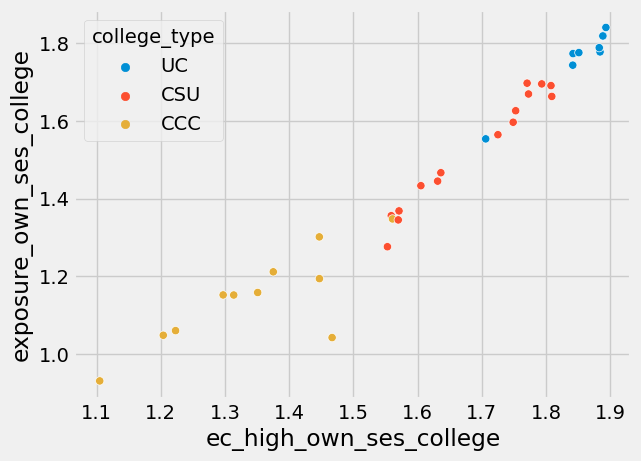

In [61]:
sns.scatterplot(data=california_colleges.query("college_type != 'Other'"), x='ec_high_own_ses_college', y='exposure_own_ses_college', hue='college_type')

In [62]:
class Center():
    def __init__(self, data):
        """generates a random center inside the region bounded by the data"""        
        num_dimensions = data.shape[1]
        self.coordinates = np.array([0.0] * num_dimensions)
        for i in range(num_dimensions):
            min_value = np.min(data[:, i])
            max_value = np.max(data[:, i])            
            random_value = random.uniform(min_value, max_value)            
            self.coordinates[i] = random_value
    
    def __str__(self):
        return str(self.coordinates)

    def __repr__(self):
        return repr(self.coordinates)

    def dist(self, data_point):
        return np.sqrt(np.sum((self.coordinates - data_point)**2, axis = 1))
    
    def dist_sq(self, data_point):
        return np.sum((self.coordinates - data_point)**2, axis = 1)

In [63]:
c1 = Center(california_colleges.query("college_type != 'Other'")[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c2 = Center(california_colleges.query("college_type != 'Other'")[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)
c3 = Center(california_colleges.query("college_type != 'Other'")[['ec_high_own_ses_college', 'exposure_own_ses_college']].values)

In [64]:
def get_cluster_number(dists):
    return np.where(dists == np.min(dists))[0][0]

In [65]:
california_colleges["dist1"] = c1.dist(california_colleges[["ec_high_own_ses_college", "exposure_own_ses_college"]])
california_colleges["dist2"] = c2.dist(california_colleges[["ec_high_own_ses_college", "exposure_own_ses_college"]])
california_colleges["dist3"] = c3.dist(california_colleges[["ec_high_own_ses_college", "exposure_own_ses_college"]])
california_colleges["cluster"] = california_colleges[["dist1", "dist2", "dist3"]].apply(get_cluster_number, axis = 1)
california_colleges.query("college_type != 'Other'")

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county,college_type,dist1,dist2,dist3,cluster
102,132000,University of California-Santa Barbara,93106,6083,3450.333333,1.80382,0.01471,1.39456,0.02122,1.88924,...,-0.10762,0.09342,0.98363,0.05093,0.01894,UC,0.853421,0.283855,1.081849,1
110,113900,California State University-Long Beach,90840,6037,2863.666667,1.68150,0.01953,1.26005,0.02635,1.79335,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CSU,0.713982,0.185596,0.925334,1
111,114000,California State University-Los Angeles,90032,6037,1179.666667,1.28328,0.03061,0.80382,0.04025,1.57103,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CSU,0.441482,0.380745,0.529796,1
112,114100,California State University-Dominguez Hills,90747,6037,451.333333,1.36175,0.03984,0.79068,0.05449,1.55896,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CSU,0.431281,0.394545,0.512789,1
114,115300,California State University-Northridge,91330,6037,2348.666667,1.49511,0.02165,1.09740,0.02792,1.72509,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CSU,0.608540,0.212679,0.778985,1
122,119700,El Camino Community College District,90506,6037,3618.333333,1.06990,0.02737,0.98923,0.03465,1.44705,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CCC,0.389220,0.577608,0.315804,2
123,120300,Glendale Community College,91208,6037,1437.000000,1.21934,0.05018,0.94831,0.06412,1.56088,...,-0.07152,0.08176,0.94514,0.04692,0.01358,CCC,0.434553,0.402491,0.507048,1
139,131500,University of California-Los Angeles,90095,6037,4734.000000,1.74438,0.01635,1.39017,0.01938,1.88414,...,-0.07152,0.08176,0.94514,0.04692,0.01358,UC,0.830347,0.271046,1.045007,1
162,799300,California State University-Bakersfield,93311,6029,542.666667,1.28634,0.03117,1.08363,0.04588,1.56985,...,-0.07124,0.08728,0.98127,0.05748,0.00989,CSU,0.443829,0.403899,0.510178,1
163,1011100,Cerro Coso Community College,93555,6029,8556.333333,1.14241,0.04733,1.18235,0.05968,1.35088,...,-0.07124,0.08728,0.98127,0.05748,0.00989,CCC,0.343589,0.644923,0.240107,2


In [66]:
average_c1_length = np.mean(california_colleges[california_colleges["cluster"] == 0])["ec_high_own_ses_college"]
average_c1_width = np.mean(california_colleges[california_colleges["cluster"] == 0])["exposure_own_ses_college"]
c1.coordinates = (average_c1_length, average_c1_width)

average_c2_length = np.mean(california_colleges[california_colleges["cluster"] == 1])["ec_high_own_ses_college"]
average_c2_width = np.mean(california_colleges[california_colleges["cluster"] == 1])["exposure_own_ses_college"]
c2.coordinates = (average_c2_length, average_c2_width)

average_c3_length = np.mean(california_colleges[california_colleges["cluster"] == 2])["ec_high_own_ses_college"]
average_c3_width = np.mean(california_colleges[california_colleges["cluster"] == 2])["exposure_own_ses_college"]
c3.coordinates = (average_c3_length, average_c3_width)

In [67]:
def plot_centers_and_colorized_data(california_colleges, centers):
    current_palette = sns.color_palette()[0:len(centers)]
    sns.scatterplot(data=california_colleges.query("college_type != 'Other'"), x = "ec_high_own_ses_college", y= "exposure_own_ses_college", hue="cluster", palette=current_palette)  
    for center in centers:
        plt.plot(center.coordinates[0], center.coordinates[1], '*', markersize = 10)
    plt.xlabel('ec_high_own_ses_college')
    plt.ylabel('exposure_own_ses_college')
    legend_text = [str(i) for i in california_colleges["college_type"].where(california_colleges["college_type"] != "Other", inplace=True)]
    plt.legend(legend_text)

TypeError: 'NoneType' object is not iterable

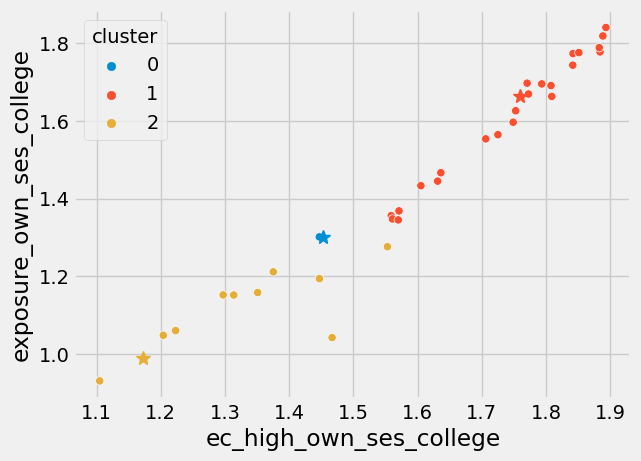

In [68]:
plot_centers_and_colorized_data(california_colleges, (c1, c2, c3))

In [72]:
ccc_only = california_colleges.query("college_type == 'CCC'")
csu_only = california_colleges.query("college_type == 'CSU'")
uc_only = california_colleges.query("college_type == 'UC'")